In [1]:
import atlaspython
import requests
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evalDate = date(2022, 9, 28)
datesStr = [(evalDate + relativedelta(months=i)).strftime('%d%m%Y') for i in range(1, 50)]
evalDateStr= evalDate.strftime('%d%m%Y')
response = requests.post('http://10.191.199.13:5000/discounts', 
            json ={'REFDATE': evalDateStr, 'CURVE': 'UF_LOC'})


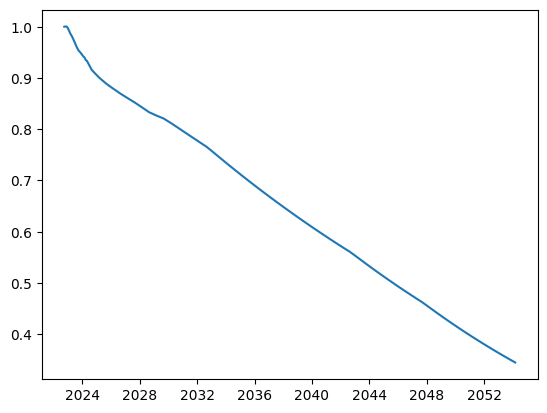

In [3]:
dates = [datetime.strptime(d, '%d%m%Y') for d in response.json()['DATES']]
values = [ v for v in response.json()['VALUES']]
data = sorted(zip(dates, values))
dates = [d for d, v in data]
values = [v for d, v in data]
nodes = {d.strftime('%d%m%Y'):k for d,k in zip(dates, values)}

plt.plot(dates,values)

In [96]:
baseData = {
    'REFDATE': evalDateStr,
    'STARTDATE': evalDateStr,    
    'ENDDATE': '20102050',
    'PAYMENTFREQUENCY':'SEMIANNUAL',
    
    'AMOUNT': 100,
    'RATE': {
        'COMPOUNDING':'SIMPLE',
        'FREQUENCY':'ANNUAL',
        'DAYCOUNTER': 'ACT360',
    },
    'DISCOUNTCURVE': 'CF_CLP',
}

In [97]:
baseData['RATE']['DAYCOUNTER'] = 'ACT360'
baseData['RATE']['COMPOUNDING'] = 'SIMPLE'
baseData['PAYMENTFREQUENCY'] = 'SEMIANNUAL'
values = []
maturity = []
tenor = []
for i in range(1,36):
    tenor.append(int(i*6))
    maturity.append(evalDate + relativedelta(months=tenor[-1]))
    baseData['ENDDATE'] = maturity[-1].strftime('%d%m%Y')
    values.append(atlaspython.fixedBulletParRate(baseData)*100)
v1 = pd.DataFrame({'tenor':tenor,'maturity': maturity, 'values': values})

In [98]:
baseData['RATE']['DAYCOUNTER'] = 'THIRTY360'
baseData['RATE']['COMPOUNDING'] = 'COMPOUNDED'
baseData['PAYMENTFREQUENCY'] = 'MONTHLY'
values = []
maturity = []
tenor = []
for i in range(1,36):
    tenor.append(int(i*6))
    maturity.append(evalDate + relativedelta(months=tenor[-1]))
    baseData['ENDDATE'] = maturity[-1].strftime('%d%m%Y')
    values.append(atlaspython.equalPaymentParRate(baseData)*100)
v2 = pd.DataFrame({'tenor':tenor,'maturity': maturity, 'values': values})

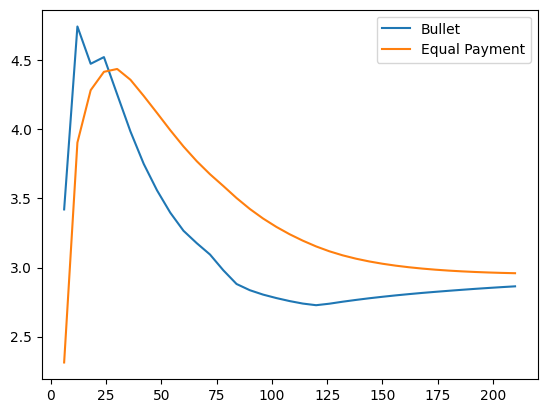

In [99]:
plt.plot(v1['tenor'], v1['values'], label='Bullet')
plt.plot(v2['tenor'], v2['values'], label='Equal Payment')
plt.legend()
plt.show()